In [ ]:
import pandas as pd

# Use read_csv for CSV files!
df = pd.read_csv('/content/diabetes.csv')

# Show the first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.model_selection import train_test_split

# X = features (all columns except 'Outcome')
# y = target (Outcome)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=200)

# Train
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7467532467532467


In [ ]:
# Example: Predict for one new patient
# (Change the values to test)
sample = [[2, 120, 70, 20, 85, 25.0, 0.5, 30]]  # Example numbers

result = model.predict(sample)

print("Prediction (0 = No Diabetes, 1 = Diabetes):", result[0])

Prediction (0 = No Diabetes, 1 = Diabetes): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Use a DataFrame with same columns as training
sample_df = pd.DataFrame([[2, 120, 70, 20, 85, 25.0, 0.5, 30]],
                         columns=X.columns)

result = model.predict(sample_df)

print("Prediction (0 = No Diabetes, 1 = Diabetes):", result[0])

Prediction (0 = No Diabetes, 1 = Diabetes): 0


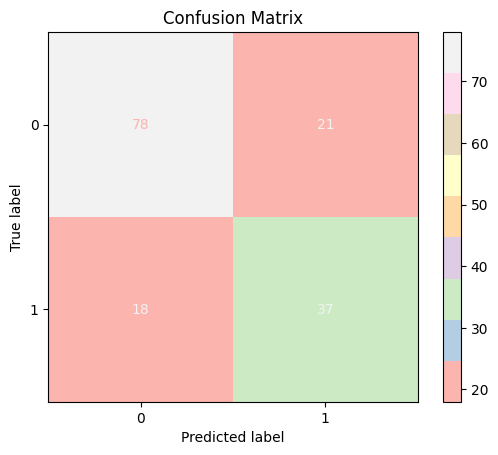

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot(cmap=plt.cm.Pastel1)  # Pretty pastel colors
plt.title("Confusion Matrix")
plt.show()

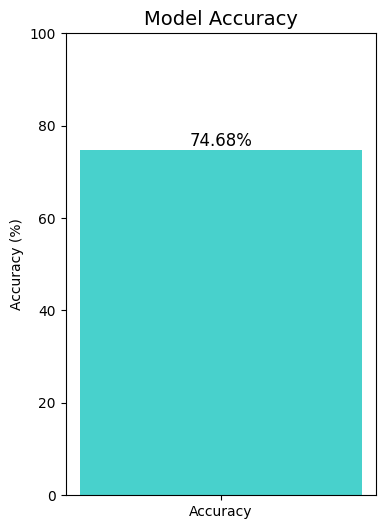

In [ ]:
import matplotlib.pyplot as plt

# Just 1 bar: your model's accuracy
accuracy = accuracy * 100  # Convert to percentage

plt.figure(figsize=(4, 6))
plt.bar(['Accuracy'], [accuracy], color='mediumturquoise')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy', fontsize=14)

# Add value on top of the bar
plt.text(0, accuracy + 1, f"{accuracy:.2f}%", ha='center', fontsize=12)

plt.show()